# K-Means


## Importing  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the data-set

In [2]:
dataset = pd.read_csv('Mall_customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x= dataset[["Annual Income (k$)" , "Spending Score (1-100)"]]

In [5]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
type(x)

pandas.core.frame.DataFrame

### Other way to split features from dataset 

In [7]:
X = dataset.iloc[:, [3, 4]].values

In [8]:
type(X)

numpy.ndarray

## Elbow method to find the optimal number of clusters

In [9]:
from sklearn.cluster import KMeans

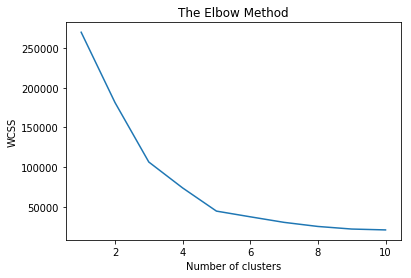

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Using random clustering method

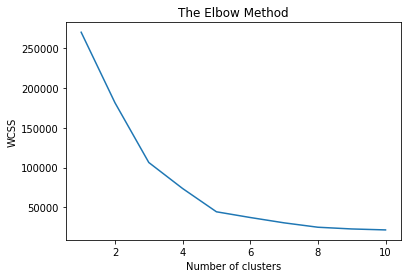

In [12]:
wcss = []
for j in range(1, 11):
    kmeans = KMeans(n_clusters=j, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Both methods random and KMeans++ gives same elbow and we will choose 5 clusters.**

**K-means is all about the analysis-of-variance paradigm. ANOVA - both uni- and multivariate - is based on the fact that the sum of squared deviations about the grand centroid is comprised of such scatter about the group centroids and the scatter of those centroids about the grand one: SStotal=SSwithin+SSbetween. So, if SSwithin is minimized then SSbetween is maximized.
SS of deviations of some points about their centroid (arithmetic mean) is known to be directly related to the overall squared euclidean distance between the points: the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. (This is the direct extension of the trigonometric property of centroid. And this relation is exploited also in the double centering of distance matrix.)
Thus, saying "SSbetween for centroids (as points) is maximized" is alias to say "the (weighted) set of squared distances between the centroids is maximized"**.

## Applying k-means to the mall dataset

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Visulizing the clusters

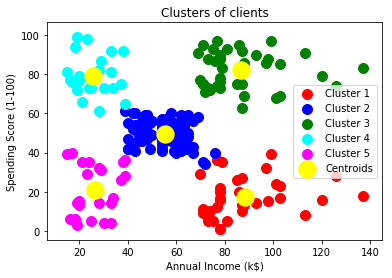

In [16]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**We can see that there are 5 different cluster with five different features. This segment of customer makes a lot of sense.<br>
Those with higer income and still have less spending score are shown by red color and hence named as "careful"<br>
The customers with average lower-mid income level have mid-spending score therefore, they are named as "standard"<br>
Those with a higher annual income having higher spending score are ideal customer for analysis hence , they are called "Target". Mall might be more interested in knowing of their behavior<br>
Those with lower annual income do have lower spending score hence, "sensible"<br>**

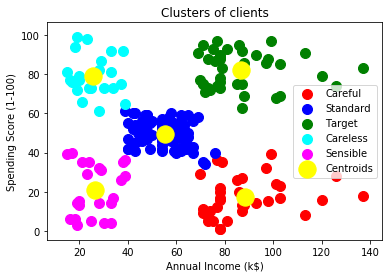

In [17]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()